# Coursework Statistics and Statistical Data Mining

#### Daniela Nogueira
14 December 2021
     

## Libraries

In [5]:
#Because the datasets are part of the ISLR library, I'll load them from this package
library(ISLR)

#To make visualizations 
library(corrplot)
library(ggplot2)
library(ggpubr)

# In order to use gather() function to collect a set of column names and places them into a single “key” column.
library(tidyverse)

#KNN
library(class)

#LDA and QDA
library(MASS)

## Task 1

#### This task involves the use of multiple linear regression on the Auto data set.

Getting general info from the data

In [6]:
?Auto

In [7]:
head(Auto) 

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


We can noticed that every column is numeric apart from name which is a categorical variable

In [8]:
#Get the shape of the dataframe
dim(Auto) 

[1] 392   9

In [9]:
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

### a) Produce a scatterplot matrix which includes all of the variables in the data set.


A scatterplot reveals relationships between two variables. This graph shows the values of Y vs the corresponding  values of X. The response is usually the variable Y (vertical axis), and the variable X is usually any variable we assume may be related to the response.

The scatterplot displays the data's relationships. A key thing to note here is that "relationships" denotes a structured relationship, such as linear and quadratic,  between X and Y; however, although causality implies association, association does not imply causality. Scatterplots are useful for determining association, although the graph may or not imply an underlying cause-and-effect mechanism. A scatterplot can never completely prove cause and effect; we can only decide if causation exists after conducting considerable research, science, and engineering. 

The scatterplot matrix generates all pairwise scatterplots on a single display.

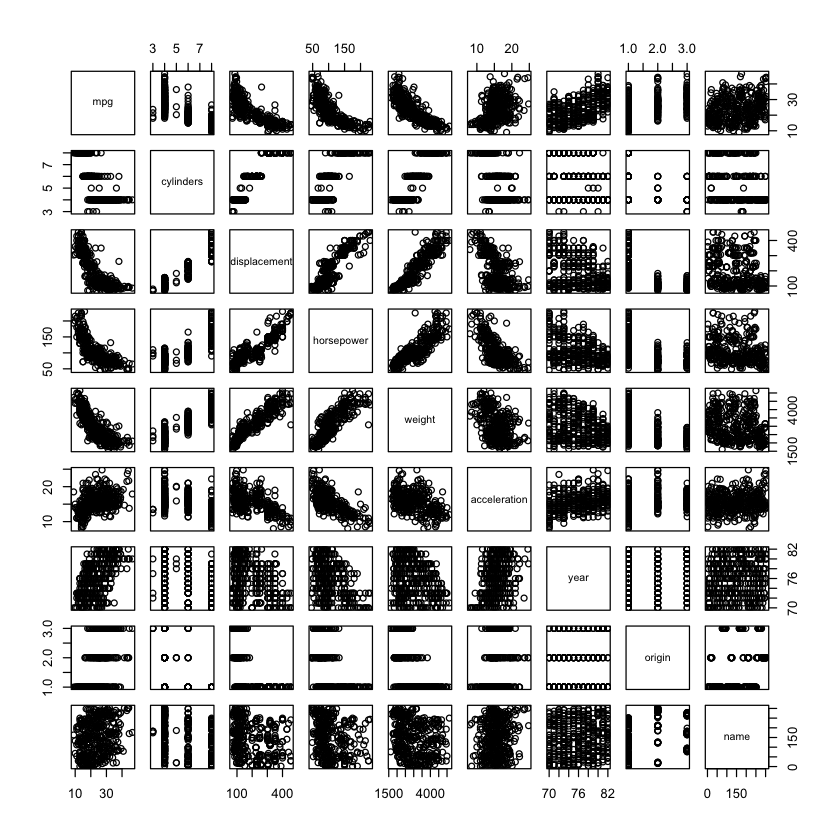

In [10]:
pairs(Auto)

### (b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.

The cor() function returns a simple correlation matrix showing the correlations between pairs of variables. We can choose the correlation coefficient to be computed using the method parameter. The default method is Pearson Correlation coefficients which are indicators of how strong is the linear relationship between two different variables, x and y. A linear relationship is  used to describe a straight-line relationship between two variables. Under this assumption, the two variables have a direct connection, which means if the value of x is changed, y must also change in the same proportion. For example, if the volume of a material is doubled, the weight of the material will also double, this is a linear relationaship.

The correlation coefficient is given in the range -1.0 to 1.0.  A positive association is indicated by a correlation coefficient greater than zero, which means that if the value of one variable rises, the value of the other tends to increase as well. On a scatterplot, positive relationships produce an upward slope. A negative correlation is shown by a correlation coefficient smaller than zero, which means that as the value of one variable rises, the value of the other variable tends to fall. Negative relationships produce a downward slope.In other words, a positive correlation indicates that both variables are moving in the same direction, whereas a negative correlation indicates that they are moving in opposite directions. Finally, a value of zero shows that the two variables x and y have no linear relationship, which means that changes in the output are not proportional to changes in the input and, in these case, when one variable increases, there is no tendency in the other variable to either increase or decrease.

There is a relationship when the value is between 0 and +1/-1, but the points do not all fall on a line. The strength of the association grows as r approaches -1 or 1, and the data points tend to fall closer to a line.

In [11]:
corr_auto = cor(subset(Auto, select = -name))
corr_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


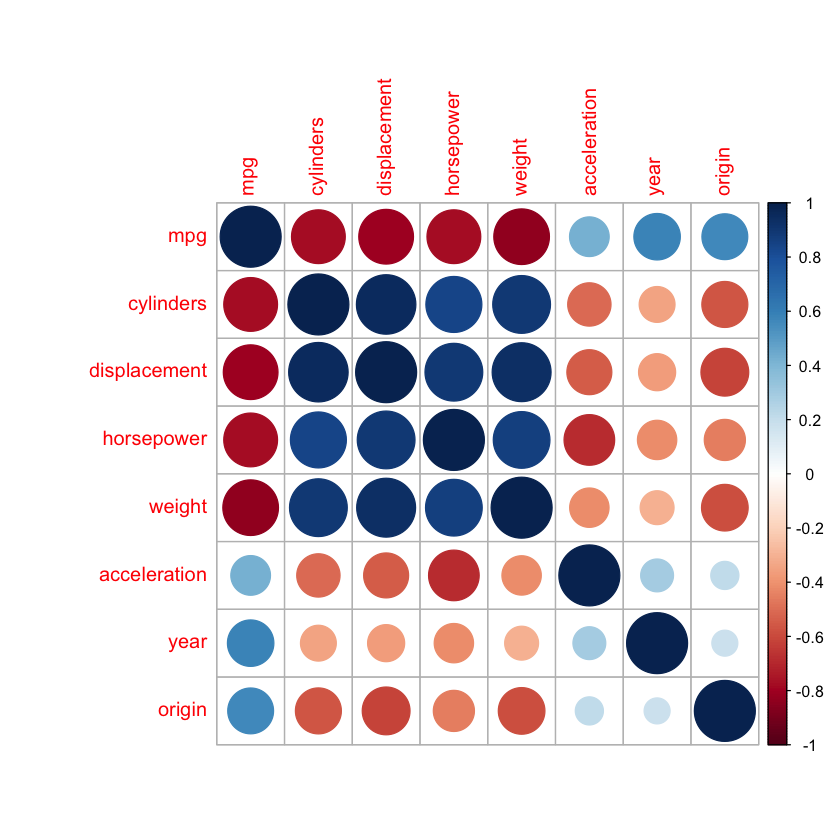

In [12]:
corrplot(corr_auto)

### (c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. 


In [13]:
lm_fit <- lm(mpg ~ .-name, data=Auto)

summary(lm_fit)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


In [14]:
confint(lm_fit)

,2.5 %,97.5 %
(Intercept),-26.349864469,-8.087004775
cylinders,-1.129001385,0.142248747
displacement,0.005119788,0.034671499
horsepower,-0.044058392,0.010156103
weight,-0.007756074,-0.005192013
acceleration,-0.113769257,0.274920933
year,0.650551315,0.850994041
origin,0.879280169,1.973000822


It is always a good idea to verify confidence intervals because they can sometimes be a good way to know if there is a negative or positive relationship between a predictor and the response. For example, the year interval has only positive values which means a positive relationship between the variable year and response mpg; we can also see this by the positive correlation existing between them. The same happens to the variable origin.

Residuals provide a general idea of the difference between the true observed value of the dependent variable (Y) and the predictions, as well as precise details such as the minimum, first quarter, median, third quarter, and maximum values. This information wil be not much relevelant for our analysis.

The intercept is giving data when all of the predictors are zero.  It wil be not much relevelant for our analysis as well. 

#### 1. Is there a relationship between the predictors and the response?

The F-statistic is huge (252.4) and the p-value is very small (< 2.2e-16) which indicates evidence against the null hypothesis that there is no relationship between predictors and response, meaning that all regression coefficients would be equal to zero. We reject the null hyphotesis. The small p-value indicates that at least one coefficient in the model is not zero.

The p-value smaller than 0.05 also indicates that overall model is significant meaning that the linear regression model provides a better fit to the data than the model with no predictor variables but it does not mean that all the variables are significant. The statistic is just comparing the joint effect of all the variables together. When the P-value for the overall F-test is less than the significance level (generally 0.005) we can conclude that the R-squared value is significantly different from zero, as we can obverve here (Multiple R-squared:  0.8215 and Adjusted R-squared:  0.8182). The R-square measures the strength of the relationship between our model and the dependent variable, indicating the percentage of the variance in the dependent variable that the independent variables explain collectively. We can obeserved that, in this case, the model explains a good proportion (around 80%) of the variability in the dependent variable mpg.

##### Note: whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the other variable. Theoretically, if a model could explain 100% of the variance, the fitted values would always equal the observed values and, therefore, all the data points would fall on the fitted regression line.


#### 2. Which predictors appear to have a statistically significant relationship to the response?



The predictors that appear to have a statistically significant relationship to the response are: displacement, weight, year, and origin. All of them present a very small p-values and significant T-values which indicates that the beta coefficient of those predictors are significantly different from zero and these variables have a strong impact on the response mpg.  

#### 3. What does the coefficient for the year variable suggest?



A regression coefficient βj estimates the expected change in Y per unit change in Xj, with all other predictors held fixed. Consequently, the coefficent estimate for the year variable suggests that with a one year increase, miles per gallon increases, on average, by 0.750773, holding all the other variables constant.

### (d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

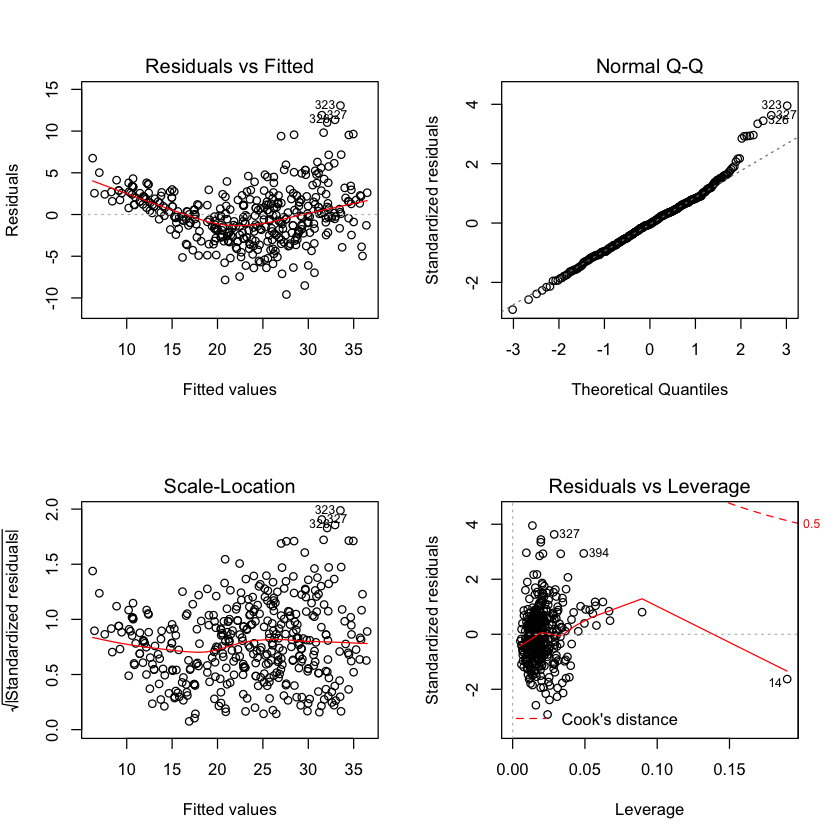

In [15]:
par(mfrow=c(2,2)) 

plot(lm_fit)

The Residuals vs Fitted plot shows if residuals have non-linear patterns. There could be a non-linear relationship between predictor variables and an outcome variable and the pattern could show up in this plot if the model does not capture the non-linear relationship. In this case, the model seems to be close to linear. The line is slightly curve but not so distant from what would be a straight horizontal line, in general, we can find equally spread residuals around the line, with only few points presenting distinct patterns (323,327,328), which is a good indication that we do not have significant non-linear relationships. 

The Normal Q-Q plot shows that the residuals are normally distributed and they follow the straight line well.

Spread-Location plot shows if residuals are spread equally along the ranges of predictors. We can see, in general, a horizontal line with equally spread points, which is good.


Th Residuals vs Leverage plot helps us to find influential cases if any. Not all outliers are influential in linear regression analysis. Even though data have extreme values, they might not be influential to determine a regression line. That means, the results would not be much different if we either include or exclude them from our analysis. On the other hand, some cases could be very influential even if they look to be within a reasonable range of the values. They could be extreme cases against a regression line and can alter the results if we exclude them from analysis. 

Unlike the other plots, this time patterns are not relevant. We watch out for outlying values at the upper right corner or at the lower right corner. Those spots are the places where cases can be influential against a regression line.We should look for cases outside of a dashed line, Cook’s distance. When cases are outside of the Cook’s distance (meaning they have high Cook’s distance scores), the cases are influential to the regression results. 

In our model, we can obverve that in all other plots observations 327 and maybe 394 seemed to follow sightly different paterns comparing to other obeservations, but although they could seem to be influential outliers, they are not since they are inside of the Cook’s distance. Contrary, the observation 14 is the one that we should pay attention since it seems to be an extrem case which can alter a lot the regression results, if removed. The  observation 14 has a high Cook’s distance score and a very high leverage comparing to the other variables, meaning that observation 14 is an influential case.

### (e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?


In [16]:
lm.fit2 <- lm(mpg ~ weight * acceleration, data=Auto)
summary(lm.fit2)


Call:
lm(formula = mpg ~ weight * acceleration, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5823  -2.6411  -0.3517   2.2611  15.6704 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.814e+01  4.872e+00   5.776 1.57e-08 ***
weight              -3.168e-03  1.461e-03  -2.168  0.03076 *  
acceleration         1.117e+00  3.097e-01   3.608  0.00035 ***
weight:acceleration -2.787e-04  9.694e-05  -2.875  0.00426 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.249 on 388 degrees of freedom
Multiple R-squared:  0.706,	Adjusted R-squared:  0.7037 
F-statistic: 310.5 on 3 and 388 DF,  p-value: < 2.2e-16


Decided to make interaction with weight and acceleration since they present a negative correlation of only -0.4168392. Also because weight was considered  as having a statistically significant relationship to the response mpg, I wanted to see if by doing some interaction, It would positively impact the model. Good news, the model shows that there is a significant interaction between weight and acceleration, since the p-value is low under the assumption of a 0.05 significance level and the F-statistic is huge which means the model well fits the data.

In [17]:
lm_fit3 <- lm(mpg~  horsepower + cylinders + horsepower:cylinders, data=Auto)

summary(lm_fit3)


Call:
lm(formula = mpg ~ horsepower + cylinders + horsepower:cylinders, 
    data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5862  -2.1945  -0.5617   1.9541  16.3329 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          72.815097   3.071314  23.708   <2e-16 ***
horsepower           -0.416007   0.034521 -12.051   <2e-16 ***
cylinders            -6.492462   0.510560 -12.716   <2e-16 ***
horsepower:cylinders  0.047247   0.004732   9.984   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.094 on 388 degrees of freedom
Multiple R-squared:  0.727,	Adjusted R-squared:  0.7249 
F-statistic: 344.4 on 3 and 388 DF,  p-value: < 2.2e-16


The model returned a really low p-value, a great F-statistic of 344.4 and all the coefficients were statistically significant with 0.05 significance level. This means that the interaction between cylinders and horsepower is statistically significant.

In [18]:
lm.fit4 <-  lm(mpg ~ cylinders * displacement + displacement* weight,  data = Auto)
summary(lm.fit4)


Call:
lm(formula = mpg ~ cylinders * displacement + displacement * 
    weight, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2934  -2.5184  -0.3476   1.8399  17.7723 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             5.262e+01  2.237e+00  23.519  < 2e-16 ***
cylinders               7.606e-01  7.669e-01   0.992    0.322    
displacement           -7.351e-02  1.669e-02  -4.403 1.38e-05 ***
weight                 -9.888e-03  1.329e-03  -7.438 6.69e-13 ***
cylinders:displacement -2.986e-03  3.426e-03  -0.872    0.384    
displacement:weight     2.128e-05  5.002e-06   4.254 2.64e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.103 on 386 degrees of freedom
Multiple R-squared:  0.7272,	Adjusted R-squared:  0.7237 
F-statistic: 205.8 on 5 and 386 DF,  p-value: < 2.2e-16


Interaction between displacement and weight is statistically signifcant, while the interaction between cylinders and displacement is not, presenting a p-value much higher than 5% (0.384).


### (f) Try a few different transformations of the variables, such as log(X), sqrt(X), X**2. Comment on your findings.


In [19]:
lm_fit5 <- lm(mpg ~ cylinders + displacement + I(horsepower^2) + weight + I(acceleration^2) + year + origin, data = Auto) 
summary(lm_fit5)


Call:
lm(formula = mpg ~ cylinders + displacement + I(horsepower^2) + 
    weight + I(acceleration^2) + year + origin, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3667 -2.1937  0.0469  1.8433 12.9792 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -2.040e+01  4.117e+00  -4.955 1.09e-06 ***
cylinders         -2.820e-01  3.270e-01  -0.862  0.38896    
displacement       1.056e-02  7.792e-03   1.355  0.17606    
I(horsepower^2)    8.480e-05  4.139e-05   2.049  0.04116 *  
weight            -7.118e-03  5.831e-04 -12.208  < 2e-16 ***
I(acceleration^2)  7.994e-03  2.503e-03   3.194  0.00152 ** 
year               7.845e-01  5.033e-02  15.587  < 2e-16 ***
origin             1.193e+00  2.795e-01   4.267 2.50e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.305 on 384 degrees of freedom
Multiple R-squared:  0.8239,	Adjusted R-squared:  0.8207 
F-statistic: 256.7 on 7 an

Because we concluded before that horsepower and acceleration  had no statistically significant relationship to the response mpg,  I decided to try a polynomial regression on both variables. The new model has  F-statistic of 256.7 and a p-value of 2.2e-16, indicating that the null hypothesis that the regression coefficients are equal to zero is rejected. In this new model, the squared features become statistically significant at 5% significance level, different from what we observed before when these variables had not been transformed.

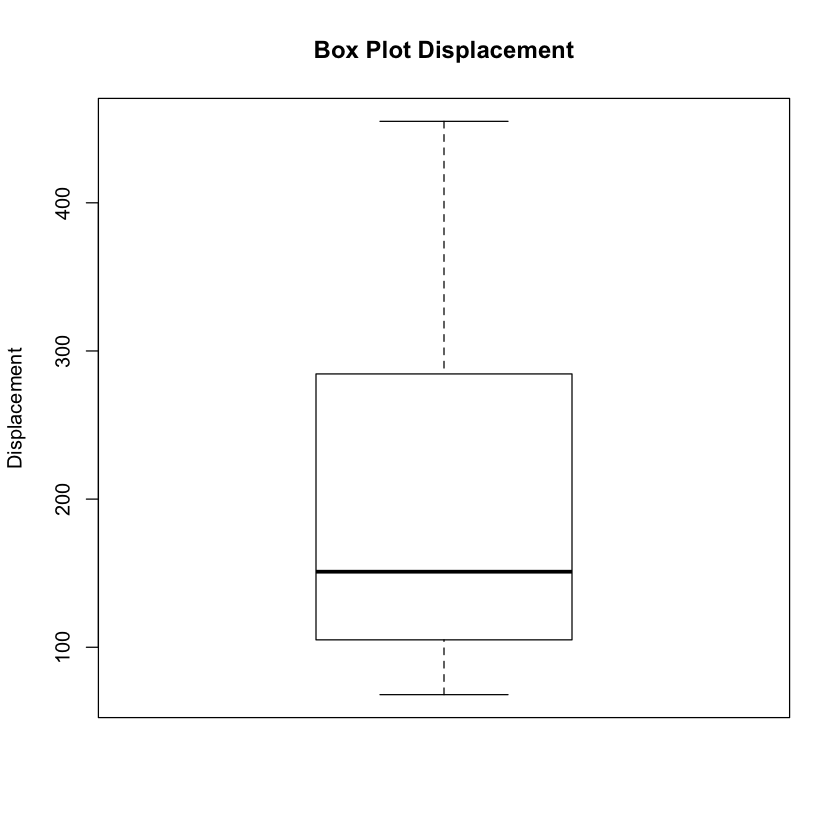

In [20]:
boxplot(Auto$displacement, data=Auto$displacement, main="Box Plot Displacement", 
    xlab="", ylab="Displacement")

We can see that the variable displament does not follow a normal distribution, we can log transform this variable to make it as “normal” as possible in order reduce the skewness.

In [21]:
lm_fit6 <- lm(mpg ~ cylinders + log(displacement) + horsepower + weight + acceleration + year + origin, data = Auto) 
summary(lm_fit6)


Call:
lm(formula = mpg ~ cylinders + log(displacement) + horsepower + 
    weight + acceleration + year + origin, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6594  -1.8712  -0.0741   1.6427  12.8462 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.3922996  7.1102490   0.336 0.736709    
cylinders          0.8052759  0.3081112   2.614 0.009312 ** 
log(displacement) -5.2475829  1.3910486  -3.772 0.000187 ***
horsepower        -0.0048428  0.0130659  -0.371 0.711106    
weight            -0.0044886  0.0006912  -6.494 2.58e-10 ***
acceleration      -0.0047404  0.0986602  -0.048 0.961703    
year               0.7437614  0.0503990  14.757  < 2e-16 ***
origin             0.6282457  0.3011778   2.086 0.037642 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.297 on 384 degrees of freedom
Multiple R-squared:  0.8247,	Adjusted R-squared:  0.8215 
F-statistic: 258.1 on

In [22]:
#Baseline model
summary(lm_fit)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


We can notice that the variables which have a strong correlation with displacement suffered some changes in relation to p-values and t-values, compared to the original model (lm_fit). This could happen because as they are very correlated, any effect in displacement is soaked up by these variables. Cylinders variable, for example, has become statistically significant. The overall F-statistic also sightly increased to 258.1.

## Task 2

#### This task should be tackled using the Carseats data set.

Getting general info from the data

In [23]:
?Carseats

In [24]:
head(Carseats) 

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [25]:
dim(Carseats)

[1] 400  11

In [26]:
summary(Carseats)

     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

ShelveLoc, Urban and  US  are categorical variables

### (a) Fit a multiple regression model to predict Sales using Price, Urban, and US

In [27]:
lm_carseats <- lm(Sales ~ Price + Urban + US, data = Carseats)

summary(lm_carseats)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


### (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!


As said before, a regression coefficient βj estimates the expected change in Y per unit change in Xj, with all other predictors held fixed. Consequently, with a one unit increase in price, sales decrease, on average, by 0.054459 (i.e. the store will sell 55 less carseats), holding other predictors constant. Sales are 0.021916 lower for observations that the store is in an urban location, holding other predictors constant. Sales are 1.200573 higher for observations that the store is in the US, holding others predictors fixed.

### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

Model in equation form: 
Sales = 13.043469 + (-0.054459)Price + (- 0.021916)UrbanYes + 1.200573USYes 


Additional info:
Urban and Us variables were treated as dummy variables (1 for YES, 0 for NO)

### (d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?

We can reject the null hyphothesis for the predictors Price and USYES since both p-values and t-values are significant, in both cases, the p-value is very small and lower than 5% significance level. Consequently, there are strong evidences to conclude that their coefficients are different from zero. 

### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [28]:
lm_carseats2 <- lm(Sales ~ Price + US, data = Carseats)

summary(lm_carseats2)


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


### (f) How well do the models in (a) and (e) fit the data?


Residual standard error is used to describe the difference in standard deviations of observed values versus predicted values. Consequently, the smaller, the better. 
The R-squared represents the proportion of the variance for a dependent variable that is explained by the independent variables in a regression model. So, the higher, the better. R-squared as said before, also provides an estimate of the strength of the relationship between the model and the response variable.
Both models fit the data very similarly since there is no huge differences in the RSE and R-squared values between them. Additionally, they both seem to fit the data well. However, the model in (e) has lower RSE than the model in (a), but only slightly lower, so it slightly better fits the data, which means it  does slightly better predictions, maybe because it does not include a non-significant variable. 

### (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).



In [29]:
confint(lm_carseats2)

,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


As said before, confidence intervals can sometimes be a good way to know if there is a negative or positive relationship between a predictor and a response. We verify that the confidence interval of the variable price has only negative values which means that there is a negative relationship between the variable Price and response sales, meaning that they move in opposite directions.

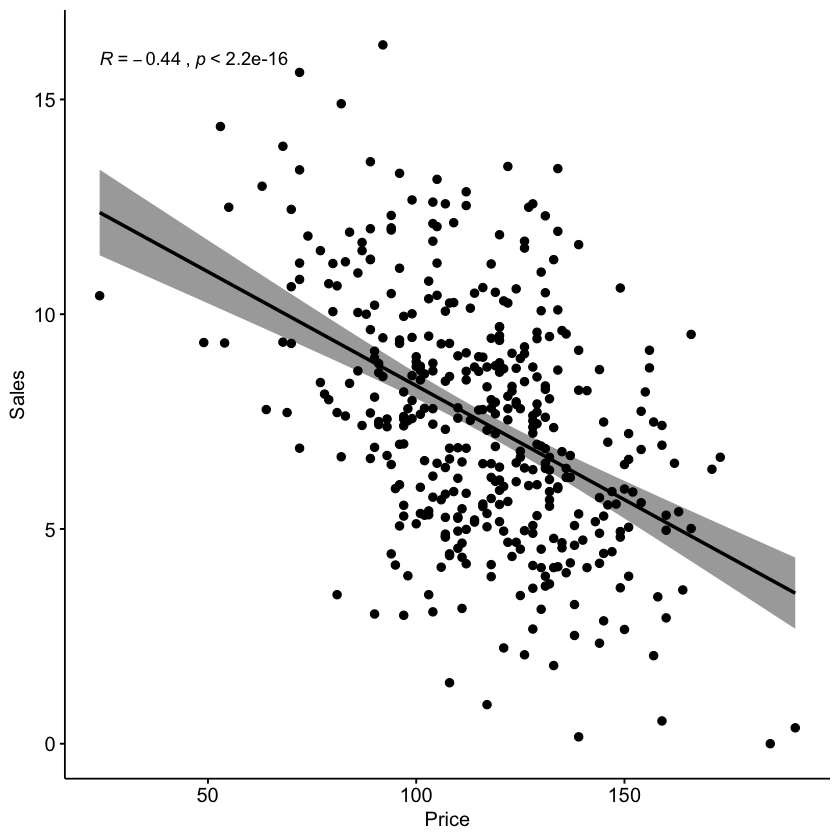

In [30]:
ggscatter(Carseats, x = "Price", y = "Sales", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Price", ylab = "Sales")

From the scatterplot, We can visualize a downward slope which proves that the variables Price and Sales are negative correlated, as we can also see by the r = -0.44. Also here, we can see that the p-value is very small so there is a statistical relationship between two variables. We can also conclude there is a linear relationship.

### h) Is there evidence of outliers or high leverage observations in the model from (e)?


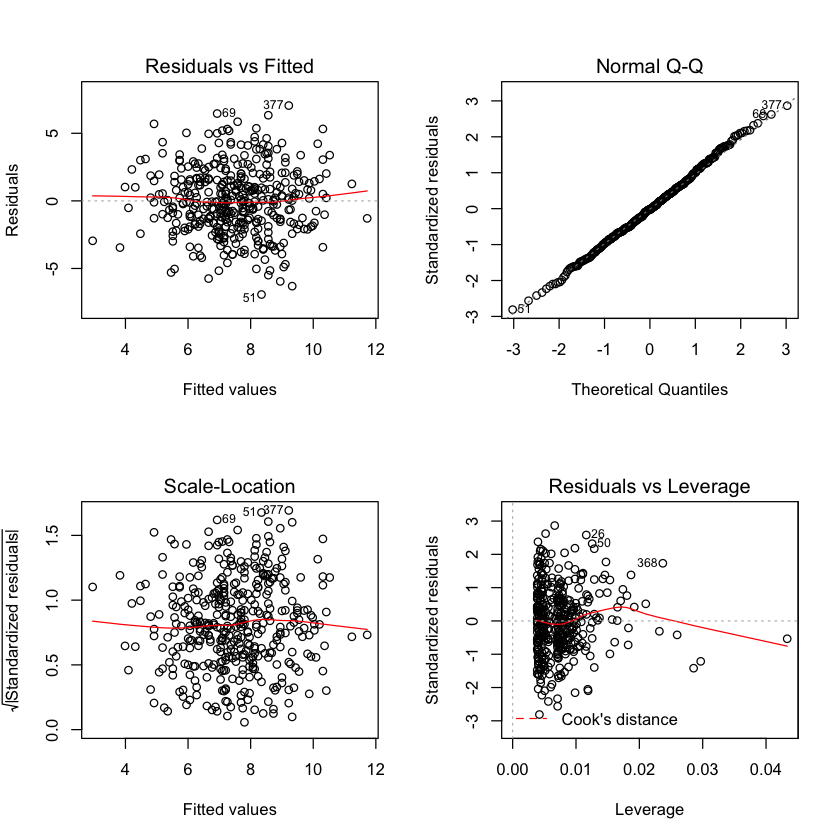

In [31]:
par(mfrow=c(2,2)) 

plot(lm_carseats2)

There is evidence of both outliers and high leverage points in the model. We can see that observations 377 and 69 ,mainly, present slighly different patterns compared to other observations in the plots Residuals vs Fitted, Normal Q-Q and Scale-Location, being a bit isolated from the rest points. 

The Residuals vs Leverage graph reveals that some observations have leverage values that appear to be exceptionally high, mainly the one, whose the number is unknown, which is very at the extrem right hand-side. This value seems to be an influential outlier. 



### Task 3

#### This task should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from the chapter 4’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

Getting general info from the data

In [32]:
?Weekly

attach(Weekly)

In [33]:
head(Weekly) 

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


Direction is a qualitative variable

### (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?


In [34]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

There are no clear patterns in the Lag variables. The discrepancy between the median and the mean can indicate some skewness which is related to a distortion that deviates from the normal distribution.
the Lag values have almost the same mean, additionally, it is important to notice that the Today variable has roughly the same mean as the Lag variables.

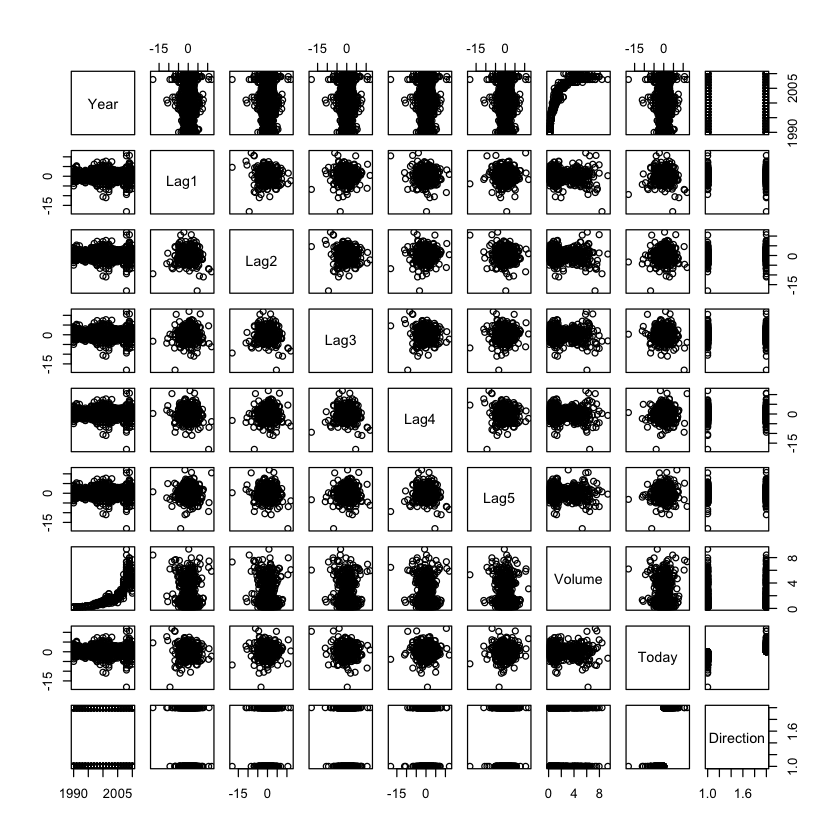

In [35]:
pairs(Weekly)

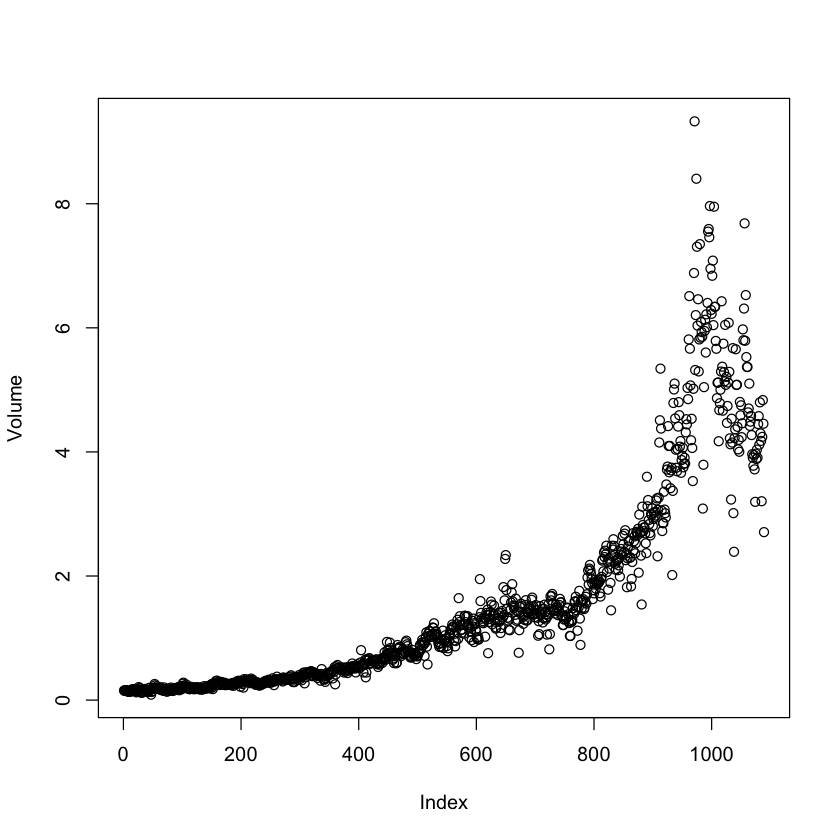

In [36]:
plot(Volume)

There do not seem to be any evident trends in the initial summary statistics and scatterplot matrix, other from the fact that the weekly volume of shares traded has increased significantly from 1990 to 2010. When we look at the scatterplot of merely volume over years, we notice that the number of shares traded each week has increased exponentially during the 21-year period.

In [37]:
cor_weekly = cor(Weekly[, -9]) # 9 is the column in the position 9 which is qualitative variable Direction
cor_weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


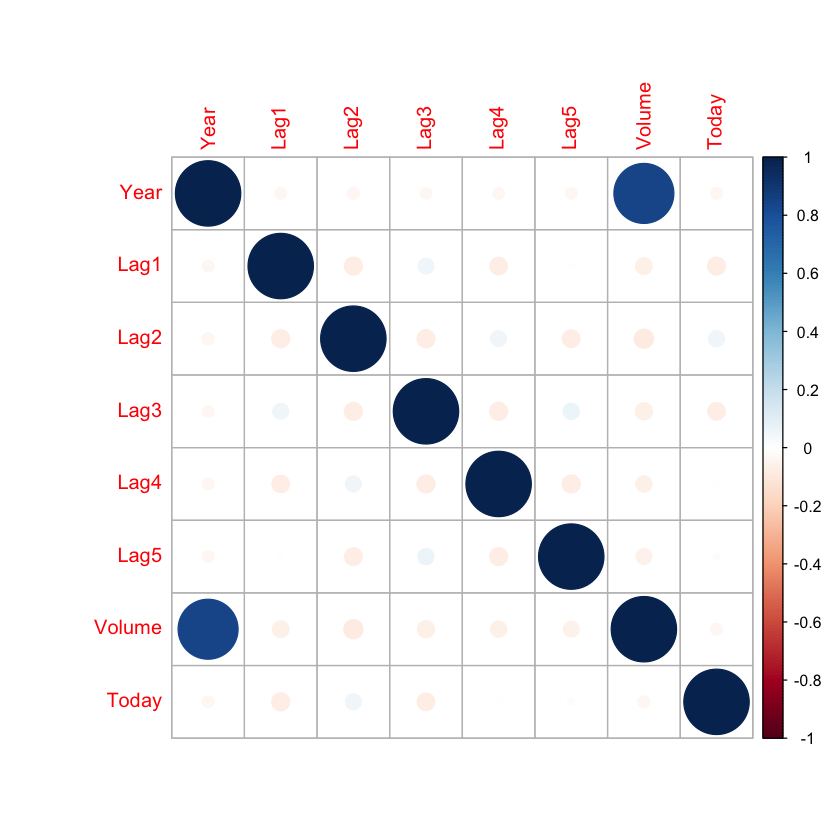

In [38]:
corrplot(cor_weekly)

Whe can verify a high positive correlation between the variable Volume and Year, as one increases, the other also increases, they move in the same direction. They appear to have a significant linear relation. All other relationships seem to be very weak and almost inexistent. The lag variables' correlations with today's variable are close to zero. To put it another way, there appears to be no association between today's returns and those from past weeks.


Warning message:
“Removed 125 rows containing non-finite values (stat_boxplot).”

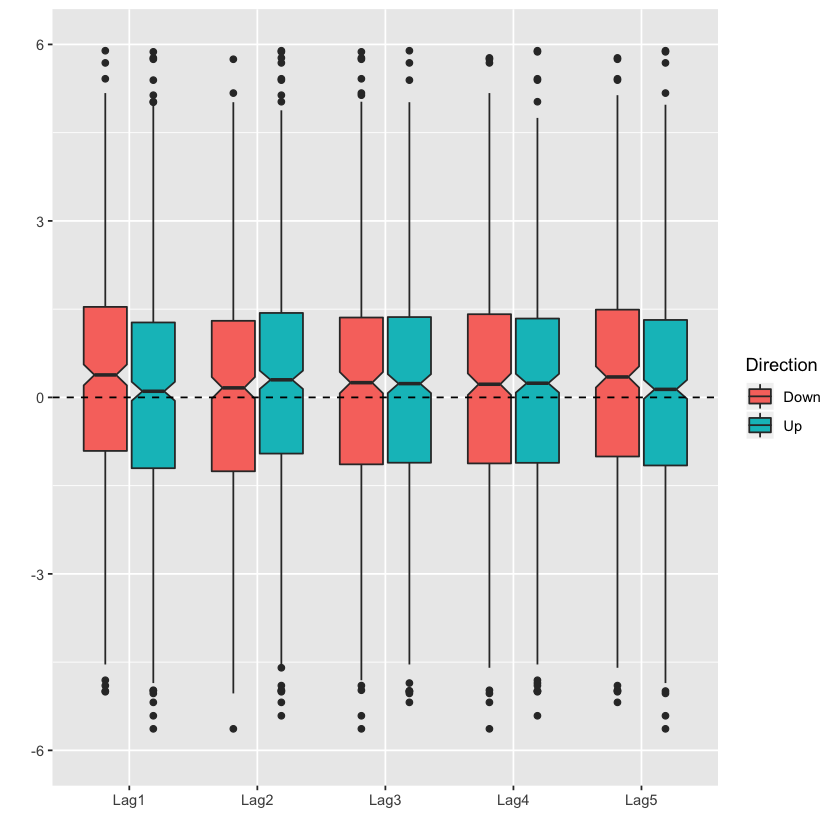

In [39]:
Weekly %>% gather(value_type, value, starts_with("Lag")) %>% ggplot(aes(value_type, value, fill = Direction)) + geom_boxplot(notch = TRUE) + labs(x = '', y = '') +ylim(c(-6, 6)) +  geom_hline(yintercept = 0, linetype = 2)


On days when a stock rose, the Lag2 variable was somewhat higher, but on days when it fell, the Lag1 variable was much greater. In the Lag5 variable, we can also notice a tiny separation based on Direction. Lag3 and Lag4 appear to be very similar. We can observed also some outliers in all Lag variables. 

In [40]:
t.test(Lag1 ~ Direction, data = Weekly)



	Welch Two Sample t-test

data:  Lag1 by Direction
t = 1.6563, df = 1047.9, p-value = 0.09795
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04378476  0.51794261
sample estimates:
mean in group Down   mean in group Up 
        0.28229545         0.04521653 


In [41]:
t.test(Lag2 ~ Direction, data = Weekly)



	Welch Two Sample t-test

data:  Lag2 by Direction
t = -2.4154, df = 1053.6, p-value = 0.01589
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.62473558 -0.06467351
sample estimates:
mean in group Down   mean in group Up 
       -0.04042355         0.30428099 


T-test is used to determine whether the means of two variables are equal to each other. We can prove what was concluded about lag1 and Lag2 from the t-test results. 

Warning message:
“Removed 125 rows containing non-finite values (stat_boxplot).”

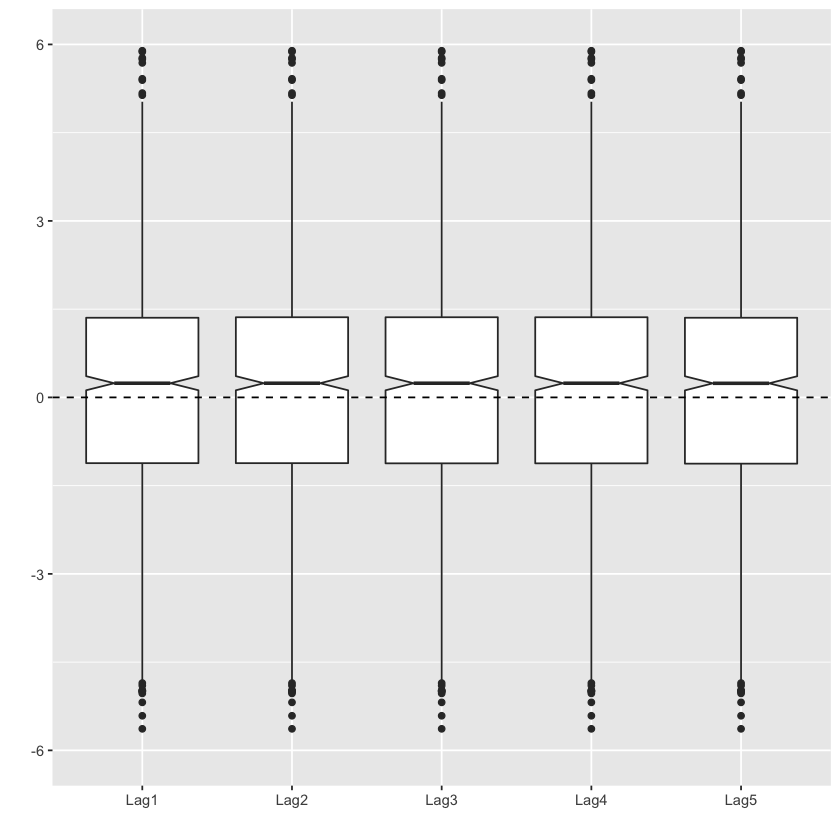

In [42]:
Weekly %>% gather(value_type, value, starts_with('Lag')) %>% ggplot(aes(value_type, value, fill = Today)) + geom_boxplot(notch = TRUE) + labs(x = '', y = '') +ylim(c(-6, 6)) +  geom_hline(yintercept = 0, linetype = 2)



We can see here that the Today variable is largely unrelated to the Lag variables, what we also observed by the correlation table above.

### (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?


In [43]:
glm.fit <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data= Weekly, family=binomial)

summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


The smallest p-value here is associated with Lag2. The positive coefficient, but very close to zero, for this predictor can suggest that if the market had a positive return 2 weeks ago, then it is likely to go up by very little (0.05844) today. Lag2 is the only variable that is statistically significant at the 0.05 level of significance. The 5 other predictors, on the other hand, fail to reject the null hypothesis that the coefficients equal zero.


### (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [44]:
glm.probs <- predict(glm.fit, type='response')

glm.pred <- rep("Down", length(glm.probs))

glm.pred[glm.probs > 0.5] = "Up"

table(glm.pred, Direction)


        Direction
glm.pred Down  Up
    Down   54  48
    Up    430 557

In [45]:
accuracy = mean(glm.pred == Weekly$Direction)
accuracy


[1] 0.5610652

The confusion matrix is used to evaluate the performance of a classification model . The predictions are listed in the rows of the confusion matrix, while the actual target values are listed in the columns.

Assuming that our goal is to correctly predict when the stock market will rise. In this case, up weeks will be considered as positive and down weeks as negative. We may now investigate four crucial numbers related with the confusion matrix: true positive rate (recall), false positive rate, precision, and true negative rate. The lower left (predicted Up actually Down) is what’s called false positives (430) and the upper right (predicted Down actually Up) are false negatives (48). The true positive rate is the number of correctly predicted positives divided by the actual number of positives, there was 557 correctly classified "UP" by the model out of a total of 605 actual up weeks, which gives a 92.07% true positive rate. However, although this seems a pretty high, the false positive rate, which is the number of incorrectly predicted positives by the actual number of negatives (430/484) was circa 88,8% which might be quite bad for a risk averse investor. The precison, which is the number of correctly predicted positives divided by the total number of predicted positives was circa 56.43% (557/987). Finally, true negative rate is calculated by dividing the number of correctely predicted negatives by the actual negatives which, in our case, is circa 11.16% (54/484) which is a ridiculously low proportion.


The model predicted "UP" for 987 weeks out of the 1089. The model correctly predicted the movement of the market for 611 weeks out of the 1089, achieving an accuracy of circa 56.11%. It is important to bear in mind that the model was trained on the whole data set, therefore 100% − 56.11% = 43.89%, is the training error
rate.The training error rate is frequently exaggerated, underestimating the test error rate. We can fit the logistic regression model using half of the data and then see how well it predicts the held-out data to further test the model's accuracy in this situation.This will result in a more realistic error rate, because in practise, we will be interested in our model's performance on unseen data in which the market's movements are unknown, rather than the data we used to fit the model. Furthermore, a naive technique of almost predicting an up week every week would have lead to the result of 56.11% of weeks for which the prediction was correct.


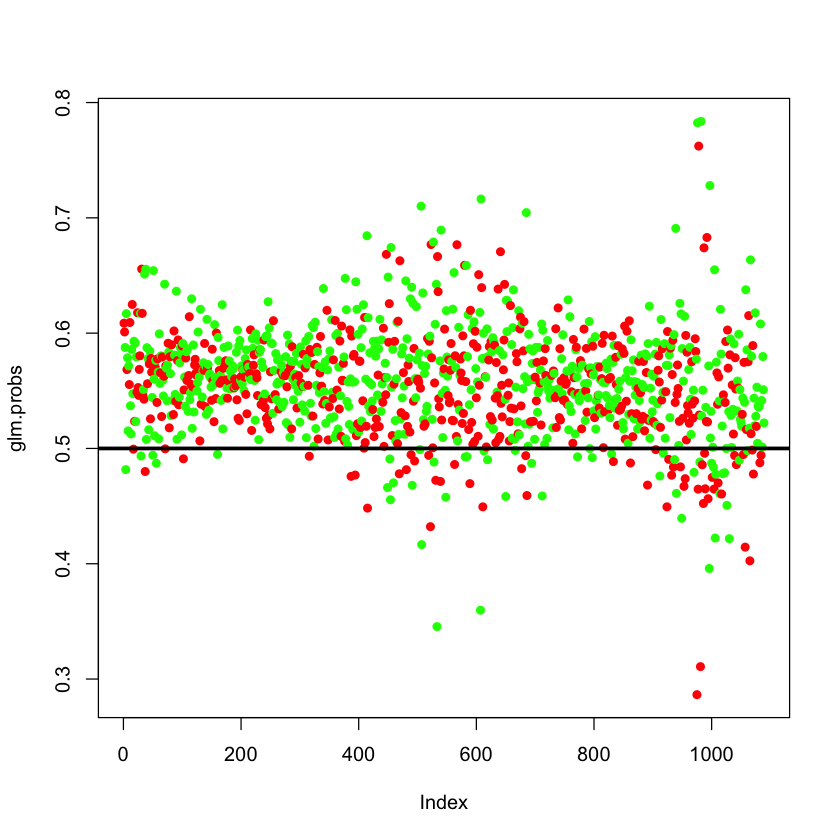

In [46]:
plot(glm.probs, col= ifelse(Weekly$Direction=="Down", "red","green"), pch=16)
abline(h = 0.5, lwd= 3)

We can observe from this graph that the majority of our chances of being "Up" are more than 0.5. As a result, if we set the criterion for considering one sample to be going up to 0.5, we will consider practically all of them to be going up.

### (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).


In [47]:
train = (Year < 2009)

glm.fit <- glm(Direction ~ Lag2, data = Weekly, subset = train, family = "binomial")
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag2, family = "binomial", data = Weekly, 
    subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [48]:
glm.probs <- predict(glm.fit, Weekly[!train, ], type = "response")

glm.pred <- rep("Down", dim(Weekly[!train, ])[1])

glm.pred[glm.probs > 0.5] = "Up"

table(glm.pred, Weekly[!train, ]$Direction)

        
glm.pred Down Up
    Down    9  5
    Up     34 56

In [49]:
mean(glm.pred == Weekly[!train, ]$Direction)


[1] 0.625

The model properly predicted the market direction for 62.5% of the weeks in the held-out data after training a logistic regression model on the data from 1990 to 2008, using only Lag2 as the predictor. However, the improvement was not significant, There was an improvement of almost 10%, over the model (c). By removing the variables that appear not to be helpful in predicting Direction, we obtained a more effective model. Continuing with the same convention that an up week is a positive, the true positive rate is circa 91.80% while the false positive rate is circa 79.07%, which continous to be a very bad result. Additionally, the precision increased, presenting a percentage of circa 62.22% and true negative rate was around 20.93%, which is much better than the last result of 11.16%. The test error rate is 37.5%.


### e) Repeat (d) using KNN with K = 1, 3, 5

#### For K=1

In [50]:
train.X = as.matrix(Lag2[train])

test.X = as.matrix(Lag2[!train])

train.Direction =Direction[train]


set.seed(1)

knn.pred <- knn(train.X, test.X, train.Direction, k = 1)

table(knn.pred, Weekly[!train, ]$Direction)

        
knn.pred Down Up
    Down   21 30
    Up     22 31

In [51]:
mean(knn.pred == Weekly[!train, ]$Direction)


[1] 0.5

The model properly predicted the market direction for 50% of the weeks in the held-out data after performing k-nearest neighbours classification with k=1 on the data from 1990 to 2008. When K = 1 is used, the results are poor, with just half of the data correctly predicted. Given the stochasticity, this seems logical. If the procedure is random, the nearest point is approximately equally likely to be of either type. It does not outperform the  logistic regression model. 

#### For K=3

In [52]:
train.X = as.matrix(Lag2[train])

test.X = as.matrix(Lag2[!train])

train.Direction =Direction[train]


set.seed(1)

knn.pred <- knn(train.X, test.X, train.Direction, k = 3)

table(knn.pred, Weekly[!train, ]$Direction)

        
knn.pred Down Up
    Down   16 20
    Up     27 41

In [53]:
mean(knn.pred == Weekly[!train, ]$Direction)

[1] 0.5480769

The overall accuracy increased almost 5% comparing to the last model with K=1. Although  there was an improvement this model still not outperforming the logistic regression model. However, the false positive rate is better than the baseline, with circa 62.79%, a significant decrease of around 16% comparing to the model (d).


#### For K=5

In [54]:
train.X = as.matrix(Lag2[train])

test.X = as.matrix(Lag2[!train])

train.Direction =Direction[train]


set.seed(1)

knn.pred <- knn(train.X, test.X, train.Direction, k = 5)

table(knn.pred, Weekly[!train, ]$Direction)

        
knn.pred Down Up
    Down   16 21
    Up     27 40

In [55]:
mean(knn.pred == Weekly[!train, ]$Direction)



[1] 0.5384615

In terms of overall accuracy, the difference between the k=3 and k=5 models is essentially non-existent, with the two models producing very identical outcomes.

#### For K=7

In [56]:
train.X = as.matrix(Lag2[train])

test.X = as.matrix(Lag2[!train])

train.Direction =Direction[train]


set.seed(1)

knn.pred <- knn(train.X, test.X, train.Direction, k = 7)

table(knn.pred, Weekly[!train, ]$Direction)

        
knn.pred Down Up
    Down   15 20
    Up     28 41

In [57]:
mean(knn.pred == Weekly[!train, ]$Direction)



[1] 0.5384615

We conclude the same as before, almost no impact by using a k equal to 7.
Increasing K turns out to provide no further improvements. It appears that KNN does not perform well in this specific data.

### h) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held-out data.

#### Linear Discriminant Analysis

Linear Discriminant Analysis predicts the class of a given observation by using linear combinations of predictors. Assumes that the predictor variables (p) are normally distributed and that the classes have the same variances (for univariate analysis, p = 1), that the values of each variable vary around the mean by the same amount on average, or that the covariance matrices are identical (for multivariate analysis, p > 1).

In [58]:
lda.fit <- lda(Direction ~ Lag2, data = Weekly, subset = train)

lda.pred = predict(lda.fit, Weekly[!train, ])
table(lda.pred$class, Weekly[!train, ]$Direction)


      
       Down Up
  Down    9  5
  Up     34 56

In [59]:
mean(lda.pred$class == Weekly[!train, ]$Direction)


[1] 0.625

We got the same confusion matrix as the baseline model (d) after doing linear discriminant analysis on the data from 1990 to 2008 using only Lag2 as the predictor. In the held-out data, the model correctly predicted market direction 62.5 percent of the time,  This is an improvement over random chance (question (e), k=1), it is still less than a 10% improvement over naively forecasting an up week every week. 

#### Linear Discriminant Analysis with interaction between Lag1 and Lag2

In [60]:
lda.fit <- lda(Direction ~ Lag1 + Lag2, data = Weekly, subset = train)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
             Lag1        Lag2
Down  0.289444444 -0.03568254
Up   -0.009213235  0.26036581

Coefficients of linear discriminants:
            LD1
Lag1 -0.3013148
Lag2  0.2982579

In [61]:
lda.pred = predict(lda.fit, Weekly[!train, ])
table(lda.pred$class, Weekly[!train, ]$Direction)

      
       Down Up
  Down    7  8
  Up     36 53

In [62]:
mean(lda.pred$class == Weekly[!train, ]$Direction)


[1] 0.5769231

In question (b) we conclude that Lag2 is the only predictor statistically significant with the smallest p-value and below 5%. As the Lag1 is the coefficient with the second smallest p-value, although it does continue to be  high, I decided to create some interaction between predictor Lag1 and Lag2, to see what could happen. Bad news, the overall accuracy for the model (57.69%) is much lower than the last one in almost 5%. 

#### Increasing the threshold for the logistic regression model  (d) in order to reduce the false negative rate

In [63]:
glm.fit <- glm(Direction ~ Lag2, data = Weekly, subset = train, family = "binomial")

glm.probs <- predict(glm.fit, Weekly[!train, ], type = "response")

glm.pred <- rep("Down", dim(Weekly[!train, ])[1])

glm.pred[glm.probs > 0.6] = "Up"

table(glm.pred, Weekly[!train, ]$Direction)

mean(glm.pred == Weekly[!train, ]$Direction)



        
glm.pred Down Up
    Down   40 51
    Up      3 10

[1] 0.4807692

Our total prediction accuracy drops to 48.1% when we use a somewhat higher likelihood criterion of 60% for predicting an up week. However, our false positive rate has dropped to aalmost 7%, a very significant improvement comparing to the original model. The precision also increased to 94.33%. This shows that a higher probability criterion could be promising if you are risk-averse investor who only want to invest when there is a good possibility of the market going up.

#### Quadratic Discriminant Analysis

QDA is used to find a non-linear boundary between classifiers. QDA, because it allows for more flexibility for the covariance matrix, tends to fit the data better than LDA, Let's see for this specific case.

In [64]:
qda.fit = qda(Direction ~ Lag2, data = Weekly, subset = train)
qda.pred = predict(qda.fit, Weekly[!train, ])
table(qda.pred$class, Weekly[!train, ]$Direction)

      
       Down Up
  Down    0  0
  Up     43 61

In [65]:
mean(qda.pred$class == Weekly[!train, ]$Direction)

[1] 0.5865385

After considering simply Lag2 as the predictor in quadratic discriminant analysis on data from 1990 to 2008, we came up with a model that predicted that every week in 2009 and 2010 would be an up week. For 58.7% of the weeks in the held-out data, the model correctly forecasted market direction. While this is better than random chance, it is the same result as naively forecasting that every week will be an up week, therefore testing on a bigger test set would be essential to compare the performance of this model to the logistic regression and linear discriminant analysis models. However,in this case, the QDA model performs poorly in comparison to the LDA model. 

### Which of these methods appears to provide the best results on this data?

If overall prediction accuracy is all that matters, logistic regression and linear discriminant analysis appear to be on par with the models that performed best on this data. The third-place winner was quadratic discriminant analysis.  With the exception of KNN k=1, I would be wary of the fact that all models significantly tended to forecast up weeks, resulting in high false-positive rates. This is a crucial point to remember. This may be acceptable for an investor who is willing to take more risks and can afford to lose money due to down weeks that were incorrectly forecasted but a risk-averse investor would probably want to use a less risky model or require a higher probability threshold than 50%. Overall, the KNN models did not appear to perform well.